<a href="https://colab.research.google.com/github/payalmohapatra/Deep-Learning-EE-435/blob/main/EE435_HW2_PMS4829.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Contact : PayalMohapatra2026@u.northwestern.edu
Sources :
https://github.com/jermwatt/machine_learning_refined/tree/gh-pages/mlrefined_libraries*

# General Code 
Input files, common functions etc.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 2_eggs.csv to 2_eggs (1).csv
Saving 3_layercake_data.csv to 3_layercake_data (1).csv
Saving optimizers_only.py to optimizers_only.py


# Q.13.1
13.1 Two-class classification with neural networks
Repeat the two-class classification experiment described in Example 13.4 beginning with the implementation outlined in Section 13.2.6. You need notreproduce
the result shown in the top row of Figure 13.9, but can verify your result via
checking that you can achieve perfect classification of the data.

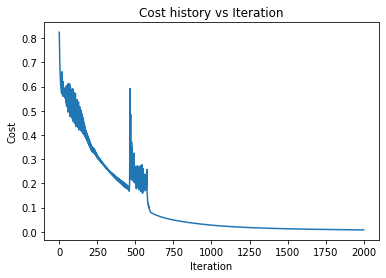

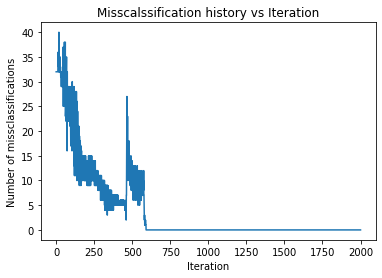

Number of misclassifications at the final iteration is [0.]


In [ ]:
from numpy.core.fromnumeric import argmax
import autograd.numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from skimage import exposure
from sklearn.datasets import fetch_openml
from optimizers_only import gradient_descent_nn
from optimizers_only import gradient_descent
data = np.loadtxt('2_eggs.csv', delimiter=',')
x = data[:2,:]
y = data[2,:][np.newaxis,:]

np.random.seed(27)
print(np.shape(x))
print(np.shape(y))
# neural network feature transformation
def feature_transforms(a, w):
    # loop through each layer
    for W in w:
        # compute inner -product with current layer weights
        a = W[0] + np. dot(a.T , W[1:])
        # pass through activation
        a = np.tanh(a). T
    return a

# neural network model
def model(theta):
    # compute feature transformation
    f = feature_transforms(x, theta[0])
    # compute final linear combination
    a = theta[1][0] + np. dot(f.T, theta [1][1:])
    return a.T

# create initial weights for a neural network model
def network_initializer(layer_sizes, scale):
    # container for all tunable weights
    weights = []
    # create appropriately -sized initial
    # weight matrix for each layer of network
    for k in range(len(layer_sizes) -1):
        # get layer sizes for current weight matrix
        U_k = layer_sizes[k]
        U_k_plus_1 = layer_sizes[k +1]
        # make weight matrix
        weight = scale* np. random. randn(U_k+ 1, U_k_plus_1)
        weights. append(weight)

    # repackage weights so that theta_init[0] contains all
    # weight matrices internal to the network, and theta_init[1]
    # contains final linear combination weights
    theta_init = [weights[:-1], weights[-1]]

    return theta_init

   
lambda_reg = 0
def softmax_func(w) :
    cost = 0
    y_pred = model(w)
    #y_pred = y_pred._value
    for p in range(y.size):
       # get pth prediction/ output pair
       y_p = y[:,p]
       y_model = y_pred[:,p]
       ## add to current cost
       cost += np.log(1 + np .exp(-np.dot(y_p,y_model)))
    return cost/ float(np.size(y))
    
  
# Initialise as per Example 13.4 from text
layer_sizes = [np.shape(x)[0],10,10,10,10,1]
w_init = network_initializer(layer_sizes,1.0)
max_its = 2000
alpha_choice = 0.1
weight_history,cost_history = gradient_descent_nn(softmax_func,alpha_choice,max_its,w_init)
plt.plot(cost_history)
plt.title('Cost history vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.figure()

misclassification = np.zeros((np.size(cost_history),1))
for i in range(np.size(cost_history)):
    pred = model(weight_history[i])
    # print('size of ')
    for j in range(np.size(pred)):
        if pred[0,j] > 0.0:
            pred[0,j] = 1.0
        else:
            pred[0,j] = -1.0
   
    pred = (pred == y)
    misclassification[i] = np.size(y) - np.sum(pred)
plt.plot(misclassification)
plt.title('Missclassification history vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Number of missclassifications')
plt.show()

print('Number of misclassifications at the final iteration is', misclassification[-1])

# Q.13.2

Multi-class classification with neural networks
Repeat the multi-class classification experiment described in Example 13.4 beginning with the implementation outlined in Section 13.2.6. You need not reproduce the result shown in the bottom row of Figure 13.9, but can verify your
result via checking that you can achieve perfect classification of the data.


Size of input is: (2, 110)
Size of output is: (1, 110)
At the end of the analysis, the # of misclassifications are: [0.]


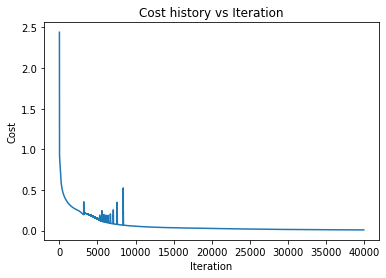

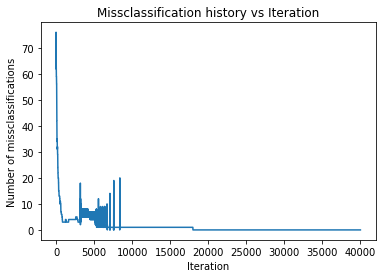

In [22]:
data = np.loadtxt('3_layercake_data.csv', delimiter=',')
x = data[:2,:]
y = data[2,:][np.newaxis,:]
y_int = y.astype(int).T

print('Size of input is:', np.shape(x))
print('Size of output is:', np.shape(y))


# create initial weights for a neural network model
def network_initializer(layer_sizes, scale):
    # container for all tunable weights
    weights = []
    # create appropriately -sized initial
    # weight matrix for each layer of network
    for k in range(len(layer_sizes) -1):

        # get layer sizes for current weight matrix
        U_k = layer_sizes[k]
        U_k_plus_1 = layer_sizes[k +1]

        # make weight matrix
        weight = scale* np. random. randn(U_k+ 1, U_k_plus_1)
        weights. append(weight)

        # repackage weights so that theta_init[0] contains all
        # weight matrices internal to the network, and theta_init[1]
        # contains final linear combination weights
        theta_init = [weights[:-1], weights[-1]]

    return theta_init

N = np.shape(x)[0] 
U_1 = 12
U_L = 5
C = 3  ## if C is > 0 it is +1 class and if it is < 0 then -1 class
layer_sizes = [N, U_1, U_L, C]
scale = -1

theta_init = network_initializer(layer_sizes, scale)
# print('Shape of theta_init is:', np.shape(theta_init))

def multisoftmax(w):
    cost = 0
    y_model = model(w)
    index = np.array([range(np.size(y))]).T
    exp_a = np.reshape(np.log(np.sum(np.exp(y_model), axis=1)), (np.size(y),1)) - y_model[index,y_int]

    cost = np.sum(exp_a)    
 
    return cost/float(np.size(y))

# # neural network feature transformation
def feature_transforms(a, w):
    # loop through each layer
    for W in w:

    # compute inner -product with current layer weights
        a = W[0] + np. dot(a.T , W[1:])
        # pass through activation
        a = np.tanh(a). T

    return a

# neural network model
def model(theta):
    # compute feature transformation
    f = feature_transforms(x, theta[0])

    # compute final linear combination
    a = theta[1][0] + np. dot(f.T, theta [1][1:])
    #cost = multisoftmax(a)
    
    return a


max_its = 40000
alpha_choice = 0.1
weight_history,cost_history = gradient_descent_nn(multisoftmax,alpha_choice,max_its,theta_init)



misclassification = np.zeros((np.size(cost_history),1))
# for i in range(1):
for i in range(np.size(cost_history)):
    pred = model(weight_history[i]).T
    pred = np.reshape(np.argmax(pred, axis=0), (1,np.size(y)))
    pred = (pred == y)
    misclassification[i] = np.size(y) - np.sum(pred)

# print(misclassification)
print('At the end of the analysis, the # of misclassifications are:', misclassification[-1])
# print('End weight is:', weight_history[-1])
plt.figure(1)
plt.plot(cost_history)
plt.title('Cost history vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.figure(2)
plt.plot(misclassification)
plt.title('Missclassification history vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Number of missclassifications')
plt.show()

plt.show()

# Q.13.3

Number of weights to learn in a neural network
(a) Find the total number Q of tunable parameters in a general L-hidden-layer
neural network, in terms of variables expressed in the *layer size*s list in Section
13.2.6. (b) Based on your answer in part (a), explain how the input dimension N and
number of data points P each contributes to Q. How is this different from what
you saw with kernel methods in the previous chapter?

Solution :
(a) The *layer size* refered in the question is as follows :<br />

*layer_sizes = [N, U_1, ..., U_L, C]*
The number of tunable parameters in this case ***Q***, is approximately (since bias term needs to be accounted for) product of all the elements in the array *layer_sizes* except the last term ***C***.
For example, for the first layer the number of inputs (N) multiplied by the number of hidden units and bias (U_1 +1). So the final number of tunable parameters is given by:<br />
*$$Q = (N+1)*U_1 + *\sum_{k=2}^L(U_{k-1} +1)*(U_k) + (U_L +1)*C$$*
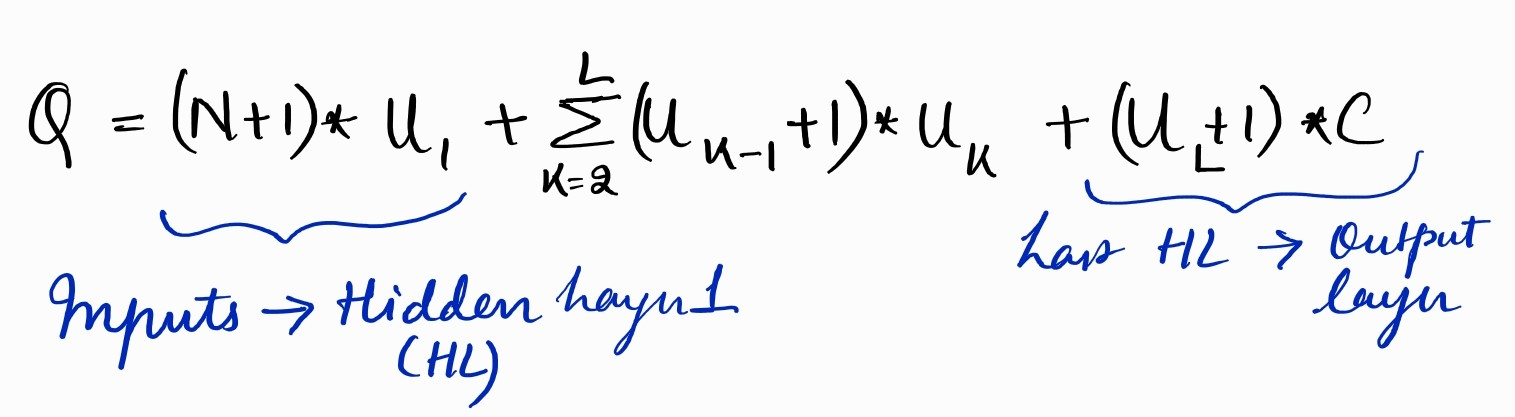
---

(b) The input dimension N plays a role in determining the number of tunable parameters in this case, however, the dataset size does not play any role. In the case of kernel methods there are scaling issues with the input dimension which can be overcome by the *kernelisation trick*. Although, it introduces a new dependency on the dataset size now.

